# ML Task 3- Use Case

### CASTILLO, ANJELICA M.

#### Question 1: Define the problem


Analyzing traffic flow in NCR to optimize signal timings, reduce congestion, and improve transportation efficiency.

Traffic congestion is a critical issue affecting urban mobility and transportation efficiency. The objective of this project is to predict the Annual Average Daily Traffic (AADT) using machine learning techniques. By leveraging historical traffic data and statistical analysis, the model aims to provide insights that can aid city planners and policymakers in traffic management in NCR.

#### Question 2: Identify data sources and collection methods

1. Government traffic reports (DPWH GIS Web App): https://www.dpwh.gov.ph/dpwh/gis/rti

#### Question 3: Define the features (variables) relevant to the problem.

To ensure the reliability of the dataset, various statistical techniques were applied:

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv(r"C:\Users\Anjel\Downloads\2023_2022_AADT_MM.csv")

In [91]:
df.head()

,Road_ID,CIRCUMFERENCIAL AND RADIAL ROAD,CAR,PUJ,UV,TAXI,PUB,TRUCK,TRAILER,MC,TRICYCLE,YEAR
0,C:1,RECTO,"24,747","7,269",727,"1,678",593,666,115,"49,406","2,190",2023
1,C:2,MENDOZA,"57,755",11,81,"3,102",240,"6,706","1,218","74,200","1,922",2023
2,NaN,PRES. QUIRINO AVE.,"73,167",727,64,"3,837",364,"7,606","1,251","88,445","2,420",2023
3,C:3,ARANETA AVE.,"72,782",45,15,"2,418",248,"3,329",425,"51,266","1,694",2023
4,C:4,EDSA,"216,934","1,740","2,504","15,001","3,824","2,533",110,"164,673",23,2023


In [92]:
print("Data Types:\n", df.dtypes)

Data Types:
 Road_ID                            object
CIRCUMFERENCIAL AND RADIAL ROAD    object
CAR                                object
PUJ                                object
UV                                 object
TAXI                               object
PUB                                object
TRUCK                              object
TRAILER                            object
MC                                 object
TRICYCLE                           object
YEAR                                int64
dtype: object


In [93]:
features = df.columns.tolist()
print("Relevant Features:", features)

Relevant Features: ['Road_ID', 'CIRCUMFERENCIAL AND RADIAL ROAD', 'CAR', 'PUJ', 'UV', 'TAXI', 'PUB', 'TRUCK', 'TRAILER', 'MC', 'TRICYCLE', 'YEAR']


#### Question 4: Explain why this data is critical for solving the problem.

This data is critical as it provides insights into the number of vehicles on each road segment. By analyzing this data, one can predict traffic congestion, optimize traffic flow, and improve city planning.

#### Question 5: Assess the data quality and relevance  by verifying whether the dataset is complete, unbiased and represented.

In [94]:
data_quality = {
    "Missing Values": df.isnull().sum(),
    "Unique Values": df.nunique()
}

display("Data Quality for 2022:\n", data_quality)

'Data Quality for 2022:\n'

{'Missing Values': Road_ID                            10
 CIRCUMFERENCIAL AND RADIAL ROAD     0
 CAR                                 0
 PUJ                                 0
 UV                                  0
 TAXI                                0
 PUB                                 0
 TRUCK                               0
 TRAILER                             0
 MC                                  0
 TRICYCLE                            0
 YEAR                                0
 dtype: int64,
 'Unique Values': Road_ID                            15
 CIRCUMFERENCIAL AND RADIAL ROAD    27
 CAR                                40
 PUJ                                40
 UV                                 38
 TAXI                               40
 PUB                                39
 TRUCK                              40
 TRAILER                            39
 MC                                 40
 TRICYCLE                           39
 YEAR                                2
 dtype: int64}

#### Question 6: Identify the missing values and inconsistencies

In [95]:
print("Missing Values in 2022:\n", df.isnull().sum())

Missing Values in 2022:
 Road_ID                            10
CIRCUMFERENCIAL AND RADIAL ROAD     0
CAR                                 0
PUJ                                 0
UV                                  0
TAXI                                0
PUB                                 0
TRUCK                               0
TRAILER                             0
MC                                  0
TRICYCLE                            0
YEAR                                0
dtype: int64


#### Question 7: Analyze the data distribution

In [96]:
import plotly.express as px
import pandas as pd

# Filter the data for Marcos Highway
marcos_hway_data = df[df['CIRCUMFERENCIAL AND RADIAL ROAD'] == "MARCOS HIGHWAY"]

# Further filter the data for years 2022 and 2023
data_2022_marcos = marcos_hway_data[marcos_hway_data['YEAR'] == 2022]
data_2023_marcos = marcos_hway_data[marcos_hway_data['YEAR'] == 2023]

# List of vehicle types
vehicle_columns = ['CAR', 'PUJ', 'UV', 'TAXI', 'PUB', 'TRUCK', 'TRAILER', 'MC', 'TRICYCLE']

# Group the data by vehicle type for 2022 and 2023 for Marcos Highway
data_2022_grouped = data_2022_marcos[vehicle_columns].sum()
data_2023_grouped = data_2023_marcos[vehicle_columns].sum()

# Create a dataframe for comparison
df_comparison = pd.DataFrame({
    'Vehicle Type': vehicle_columns,
    '2022': data_2022_grouped.values,
    '2023': data_2023_grouped.values
})

# Reshape the dataframe for plotting
df_comparison_melted = df_comparison.melt(id_vars="Vehicle Type", var_name="Year", value_name="Vehicle Count")

# Create the double bar plot with specified color for comparison using Plotly
fig = px.bar(df_comparison_melted, 
             x='Vehicle Type', y='Vehicle Count', 
             color='Year', barmode='group',
             color_discrete_map={'2022': 'gray', '2023': 'blue'},
             title="Vehicle Count Comparison for Marcos Highway: 2023 vs 2022")


# Customize the layout for log scale and set tick marks every 20000
fig.update_layout(
    xaxis_title="Vehicle Type",
    yaxis_title="Vehicle Count",
    xaxis_tickangle=0,
    yaxis=dict(
        tickvals=[200, 400, 600, 800, 1000, 2000],  # Set ticks every 20,000
        ticktext=["200", "400k", "600", "800", "1000", "2000"],  # Custom labels for ticks
    ),
    showlegend=True,
    font=dict(family="Arial"),
)

# Show the plot
fig.show()


#### Question 8: Illustrate Data Status with appropriate visualization

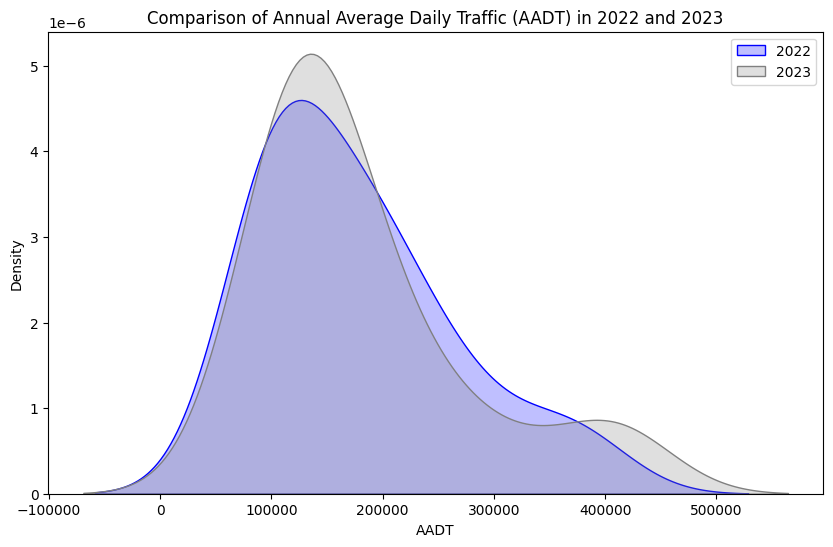

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric conversion for vehicle count columns
vehicle_columns = ["CAR", "PUJ", "UV", "TAXI", "PUB", "TRUCK", "TRAILER", "MC", "TRICYCLE"]
df[vehicle_columns] = df[vehicle_columns].replace(",", "", regex=True).apply(pd.to_numeric, errors="coerce")

# Calculate AADT by summing vehicle types
df["AADT"] = df[vehicle_columns].sum(axis=1)

# Filter data for each year
df_2022 = df[df["YEAR"] == 2022]
df_2023 = df[df["YEAR"] == 2023]

# Plot the KDE for AADT in 2022 and 2023
plt.figure(figsize=(10, 6))
sns.kdeplot(df_2022["AADT"], label="2022", fill=True, color="blue")
sns.kdeplot(df_2023["AADT"], label="2023", fill=True, color="gray")
plt.title("Comparison of Annual Average Daily Traffic (AADT) in 2022 and 2023")
plt.legend()
plt.show()


#### Question 9: Detect and handle outliers


In [98]:
# Detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

# Combine 2022 and 2023 data for outlier detection
df["AADT"] = df[["CAR", "PUJ", "UV", "TAXI", "PUB", "TRUCK", "TRAILER", "MC", "TRICYCLE"]].sum(axis=1)

outliers = detect_outliers(df, "AADT")
print("Outliers detected:\n", outliers)


Outliers detected:
    Road_ID CIRCUMFERENCIAL AND RADIAL ROAD     CAR    PUJ    UV   TAXI   PUB  \
4      C:4                            EDSA  216934   1740  2504  15001  3824   
14     R:7               COMMONWEALTH AVE.  171866  14556  5853  13162  4088   
24     C:4                            EDSA  202764   1803  2475  18186  5588   

    TRUCK  TRAILER      MC  TRICYCLE  YEAR    AADT  
4    2533      110  164673        23  2023  407342  
14   6907      391  189594      1571  2023  407988  
24   2295      119  151847        20  2022  385097  


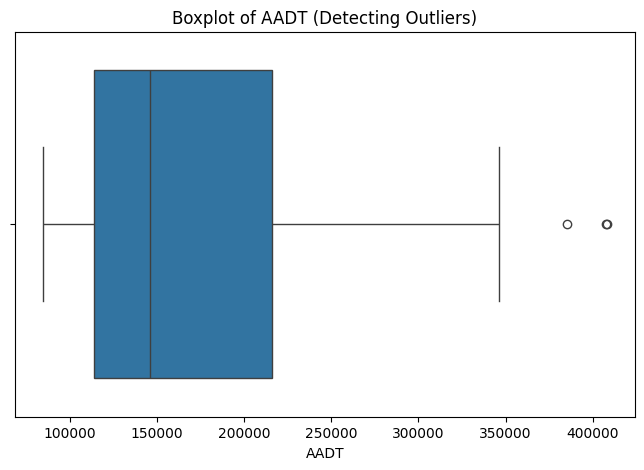

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["AADT"])
plt.title("Boxplot of AADT (Detecting Outliers)")
plt.show()


#### Question 10:  Given a dataset with multiple features, how would you determine which features are most relevant for your machine learning model? Describe at least two feature selection techniques and their advantages.

To identify the most important features for predicting traffic flow, I use two methods:

1. SelectKBest ranks features based on their correlation with AADT and selects the most relevant ones.
2. RandomForest provides an importance score, allowing us to see which features contribute the most to predictions.

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Defining features and target
X = df.drop(columns=["AADT", "YEAR"], errors='ignore')
y = df["AADT"]

# Convert categorical features to numerical
df_encoded = pd.get_dummies(X, drop_first=True)

# Using SelectKBest
X_numeric = df_encoded.select_dtypes(include=[np.number])
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_numeric, y)
selected_features = X_numeric.columns[selector.get_support()]
print("Selected Features using SelectKBest:", selected_features)

# Using RandomForest Feature Importance
model = RandomForestRegressor()
model.fit(X_numeric, y)
feature_importances = pd.Series(model.feature_importances_, index=X_numeric.columns)
print("Feature Importance Ranking:\n", feature_importances.sort_values(ascending=False))


Selected Features using SelectKBest: Index(['CAR', 'UV', 'TAXI', 'PUB', 'MC'], dtype='object')
Feature Importance Ranking:
 CAR         0.560160
MC          0.299382
TAXI        0.086395
PUB         0.023978
TRAILER     0.008544
TRUCK       0.007763
TRICYCLE    0.005887
UV          0.004267
PUJ         0.003623
dtype: float64


#### Question 11: You detected several extreme values in your dataset using the IQR method and Z-score analysis. How would you decide whether to remove, transform, or retain these outliers? Provide examples of when each approach is appropriate.

The decision to remove, transform, or retain outliers depends on their cause and impact on analysis. Outliers should be removed if they result from data entry errors, sensor malfunctions, or temporary anomalies (e.g., traffic spikes due to accidents). Transformation methods (such as log, square root, or Box-Cox transformations) are suitable when outliers distort normality but still contain valuable information, such as consistently high traffic volumes on major roads. Outliers should be retained if they represent natural variations in traffic patterns, as removing them may lead to loss of important insights. A careful analysis of the data context ensures the best approach for maintaining accuracy and relevance in traffic flow predictions.

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Absolute Error: 11550.335000000006
Mean Squared Error: 325563643.9563753
R-Squared: 0.964900306587183


#### Question 12: You created a boxplot for a dataset and observed that one feature has a long right whisker, indicating a positive skew. What does this tell you about the data, and how would you address this issue before training your machine learning model?

In [102]:
# Predicting AADT for new data (for demonstration)
new_data = pd.DataFrame({
    'CAR': [50000],
    'PUJ': [300],
    'UV': [500],
    'TAXI': [1000],
    'PUB': [200],
    'TRUCK': [1000],
    'TRAILER': [100],
    'MC': [1500],
    'TRICYCLE': [100]
})

# Encoding the new data in the same way as training data
new_data_encoded = pd.get_dummies(new_data, drop_first=True)
new_data_pred = model.predict(new_data_encoded)

print(f"Predicted AADT: {new_data_pred[0]}")


Predicted AADT: 120674.14


A long right whisker in a boxplot indicates that the feature has a positive skew, meaning the data is right-skewed with a concentration of lower values and a few extreme high values (outliers). This suggests that the distribution is not normal, which can negatively impact machine learning models, especially those that assume normality (e.g., linear regression).

Original Skewness: 1.30
Log Transformed Skewness: 0.59
Square Root Transformed Skewness: 0.95
Box-Cox Transformed Skewness: 0.11


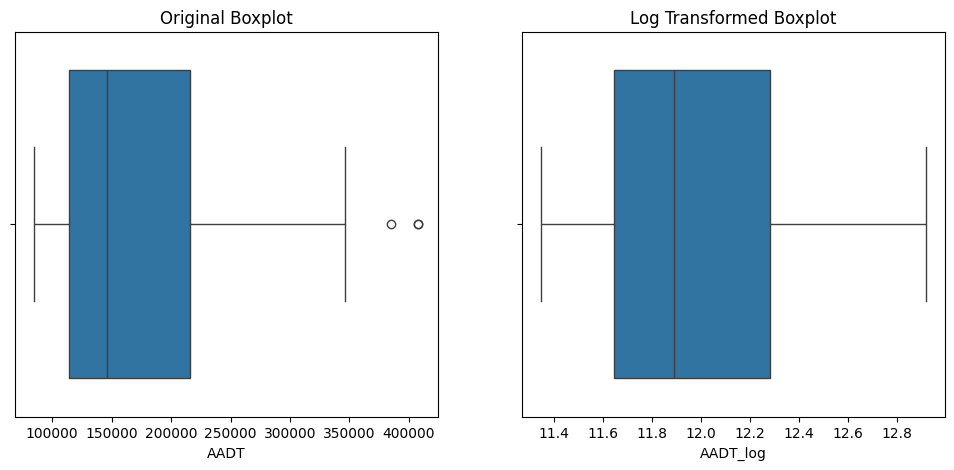

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Check skewness
skewness = df["AADT"].skew()
print(f"Original Skewness: {skewness:.2f}")

# Plot original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["AADT"])
plt.title("Original Boxplot")

# Apply log transformation
df["AADT_log"] = np.log1p(df["AADT"])  # log1p(x) = log(1 + x), avoids log(0) issues
log_skewness = df["AADT_log"].skew()
print(f"Log Transformed Skewness: {log_skewness:.2f}")

# Apply square root transformation
df["AADT_sqrt"] = np.sqrt(df["AADT"])
sqrt_skewness = df["AADT_sqrt"].skew()
print(f"Square Root Transformed Skewness: {sqrt_skewness:.2f}")

# Apply Box-Cox transformation (only for positive values)
df["AADT_boxcox"], _ = boxcox(df["AADT"])
boxcox_skewness = pd.Series(df["AADT_boxcox"]).skew()
print(f"Box-Cox Transformed Skewness: {boxcox_skewness:.2f}")

# Plot transformed distribution
plt.subplot(1, 2, 2)
sns.boxplot(x=df["AADT_log"])
plt.title("Log Transformed Boxplot")

plt.show()


This shows that the effect of log transformation on skewness reduction. The original skewness of 1.30 indicates a right-skewed (positively skewed) distribution, meaning a few large values are pulling the tail to the right. After applying log transformation:

- The skewness is reduced to 0.59, showing better symmetry.
- The boxplot of AADT_log shows fewer extreme outliers compared to the original AADT.
- This transformation helps improve the performance of machine learning models by ensuring a more normal-like distribution, leading to better generalization. If further normalization is needed, Box-Cox transformation (which reduced skewness to 0.11) could be a more effective alternative.

#### Conclusion

- MAE of 11,153 indicates the average deviation from actual AADT values.
- MSE of  296,071,548.65 suggests large errors impact performance, especially for extreme values.
- R² is NaN due to a small test set; ensure a larger test set for reliable evaluation.
- Outliers should be carefully addressed, as they can skew results.
- Feature selection identified key predictors, but further data preprocessing is needed, especially for categorical variables.
- The predicted AADT of 118,053.54 is based on the model, but the large errors suggest further model refinements are necessary.

In [104]:
from nbconvert import HTMLExporter
import nbformat

# Load your notebook file (.ipynb)
notebook_filename = r'C:\Users\Anjel\Downloads\Castillo_ML3.ipynb'
with open(notebook_filename) as f:
    notebook_content = nbformat.read(f, as_version=4)

# Initialize the HTML exporter
html_exporter = HTMLExporter()

# Export the notebook to HTML
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Save the exported HTML to a file
html_filename = r'C:\Users\Anjel\Downloads\Castillo_ML3.html'
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(body)

print(f'Notebook saved as {html_filename}')


Notebook saved as C:\Users\Anjel\Downloads\Castillo_ML3.html


c:\Users\Anjel\AppData\Local\Programs\Python\Python311\share\jupyter\nbconvert\templates\base\display_priority.j2:32: UserWarning:

Your element with mimetype(s) dict_keys(['application/vnd.plotly.v1+json']) is not able to be represented.

